In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import training data: Amazon benchmark, with additional neutral reviews
df = pd.read_csv('/content/preprocessed.csv', index_col=[0])
df.head()

,Sentiment,text
0,1,good price return
1,1,device work advertise like size
2,0,looks good battery suck phone arrive appeared ...
3,1,like new excellent condition
4,0,battery disappointment take time get use phone...


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk


In [12]:
# Calculate number of -1s
count_minus_ones = df['Sentiment'].value_counts().get(-1, 3)
print("Number of '-1' sentiments:", count_minus_ones)

#Calculate number of 1s
count_positive_ones = df['Sentiment'].value_counts().get(1, 3)
print("Number of '1' sentiments:", count_positive_ones)


#Calculate number of 0s
count_neutral = df['Sentiment'].value_counts().get(0, 3)
print("Number of '0' sentiments:", count_neutral)

Number of '-1' sentiments: 581
Number of '1' sentiments: 508
Number of '0' sentiments: 133


<Axes: >

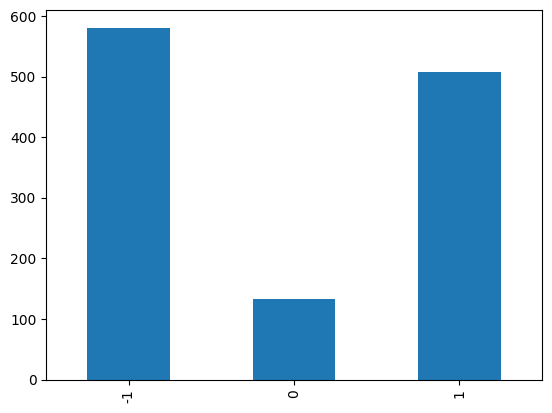

In [13]:
df['Sentiment'] = df['Sentiment'].astype('category')
df['Sentiment'].value_counts().sort_index().plot.bar()

In [5]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

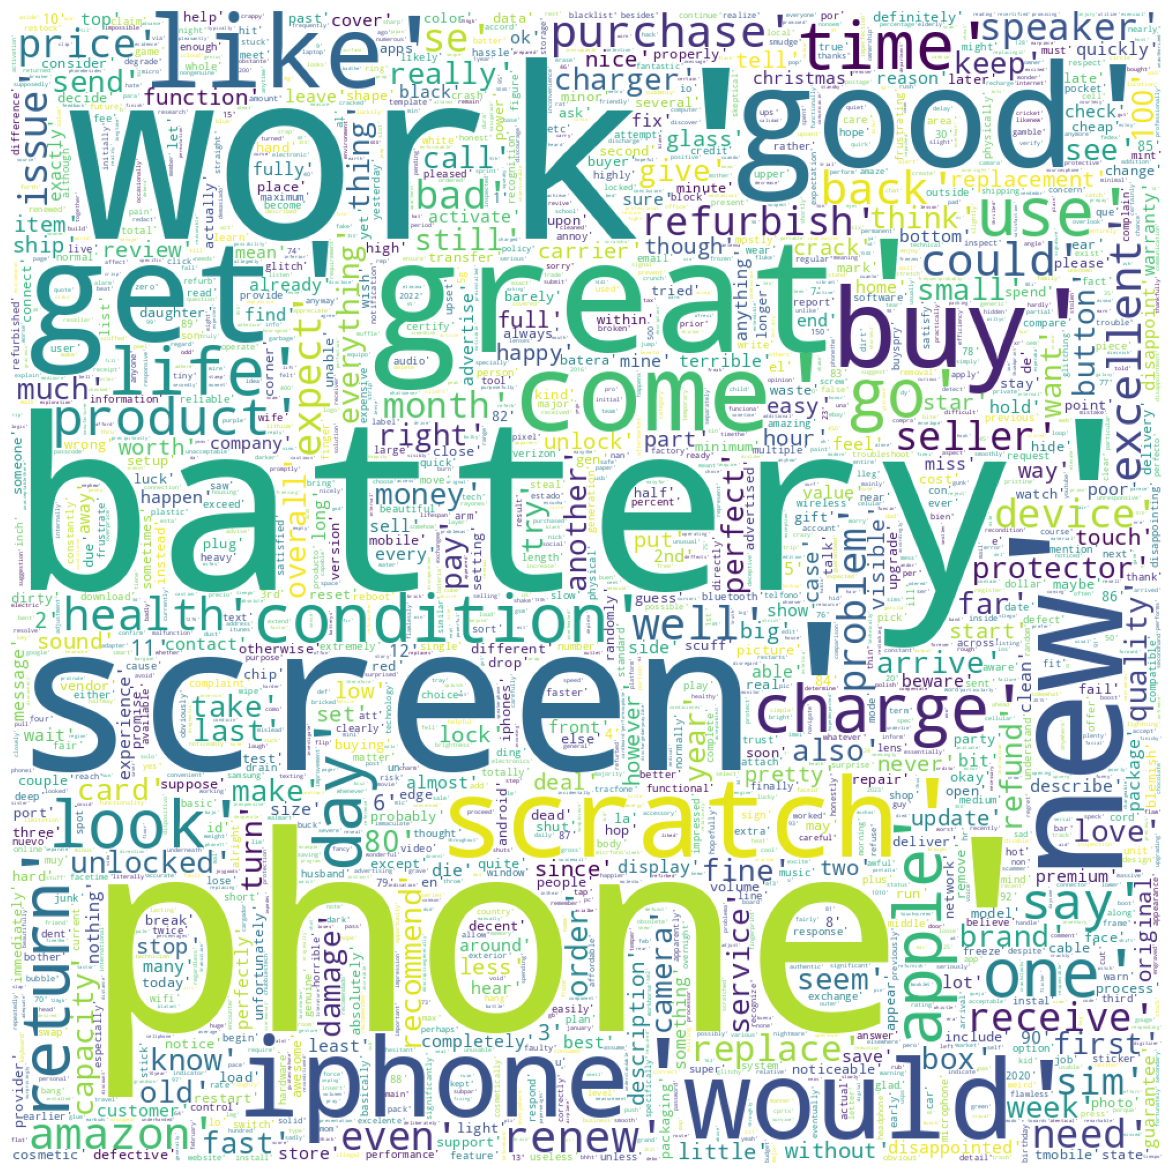

In [10]:
plt.figure(figsize=(15,15))
wordCloudFunction(df,'text',10000000)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

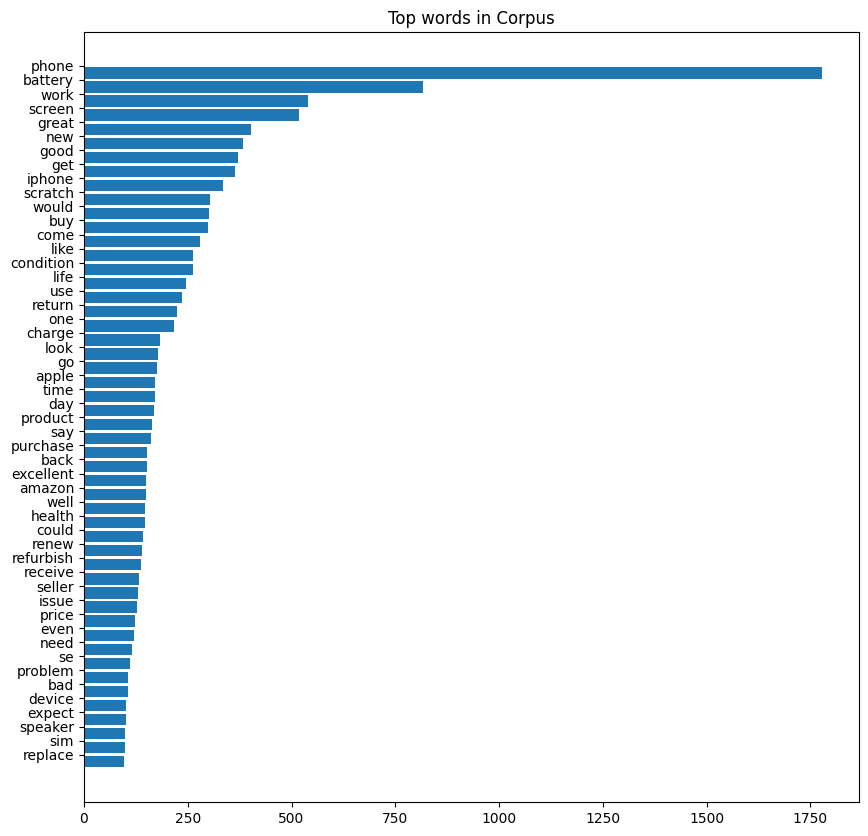

In [11]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'text',"Top words in Corpus")